<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import load_model

import pandas as pd
import numpy as np

## Информация об атрибутах

- **CRIM** – уровень преступности на душу населения по городам  
- **ZN** – доля жилых земель, зонированных под участки площадью более 25,000 кв. футов  
- **INDUS** – доля земель, занятых нежилыми (промышленными) предприятиями по городам  
- **CHAS** – фиктивная переменная, указывающая на близость к реке Чарльз (`1` – если участок граничит с рекой, `0` – в противном случае)  
- **NOX** – концентрация оксидов азота (в частях на 10 миллионов)  
- **RM** – среднее количество комнат на одно жилое помещение  
- **AGE** – доля жилых домов, построенных до 1940 года и занятых владельцами  
- **DIS** – взвешенное расстояние до пяти основных деловых центров Бостона  
- **RAD** – индекс доступности к радиальным автомагистралям  
- **TAX** – ставка налога на недвижимость на полную стоимость за $10,000  
- **PTRATIO** – соотношение числа учащихся к числу учителей по городам  
- **B** – `1000 * (Bk - 0.63)²`, где `Bk` – доля афроамериканского населения по городам  
- **LSTAT** – процент населения с низким социальным статусом  
- **MEDV** – медианная стоимость жилья, занятого владельцами (в тысячах долларов)

---

**Целевая переменная:** `MEDV` – цена, которую необходимо предсказать. Заданное значение в `$1000` соответствует `1`.

Мы будем предсказывать целевую переменную на основе 13 входных признаков.

Некоторые признаки можно игнорировать, если они не способствуют точному прогнозу.

Также возможно создание новых признаков на основе имеющихся данных.

In [84]:
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
df = pd.DataFrame(data=np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]), columns=column_names[:-1])
df["MEDV"] = raw_df.values[1::2, 2]

In [85]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns="MEDV"), df["MEDV"], test_size=0.25, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

print("Обучающая выборка:", x_train.shape, y_train.shape)
print("Валидационная выборка:", x_val.shape, y_val.shape)
print("Тестовая выборка:", x_test.shape, y_test.shape)

Обучающая выборка: (341, 13) (341,)
Валидационная выборка: (38, 13) (38,)
Тестовая выборка: (127, 13) (127,)


In [87]:
len(x_train.iloc[0])

13

In [88]:
y_train.iloc[0]

25.0

#### 1.2. Проектируем архитектуру для этой задачи

In [109]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

NUM_CLASSES = 1
input_shape = (X.shape[1],)  # 13

model = Sequential([
    Input(shape=input_shape),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='linear')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [110]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [111]:
history = model.fit(x_train, y_train, epochs=270, validation_data=(x_val, y_val))

Epoch 1/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2143.0825 - mae: 40.1889 - val_loss: 808.8457 - val_mae: 23.7876
Epoch 2/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 431.0144 - mae: 16.1383 - val_loss: 185.1367 - val_mae: 10.7650
Epoch 3/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 226.4700 - mae: 11.5544 - val_loss: 112.1752 - val_mae: 9.2650
Epoch 4/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.0746 - mae: 7.9320 - val_loss: 48.1937 - val_mae: 4.5683
Epoch 5/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.8958 - mae: 5.5018 - val_loss: 51.7022 - val_mae: 6.0195
Epoch 6/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74.7545 - mae: 6.8046 - val_loss: 40.4416 - val_mae: 4.4624
Epoch 7/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.0111 - mae: 4.9440 - val_loss: 47.4186 - val_mae: 5.6182
Epoch 8/270
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.1867 - mae: 5.6380 - val_loss: 39.5177 - val_mae: 4.6417
Epoch 9/270
11/11 ━━━━━━━━━━━━━━━━━

#### 1.6. Делаем предсказания на тестовых данных

In [112]:
predictions = model.predict(x_test)

print('Предсказания:', predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Предсказания: [[29.49146  ]
 [24.1589   ]
 [26.953518 ]
 [ 9.922727 ]
 [20.028109 ]
 [21.267939 ]
 [23.075981 ]
 [23.912594 ]
 [20.141916 ]
 [12.352825 ]
 [ 7.177085 ]
 [10.186328 ]
 [14.683317 ]
 [ 8.570528 ]
 [47.79563  ]
 [29.778772 ]
 [24.359655 ]
 [36.803974 ]
 [32.80968  ]
 [24.57868  ]
 [24.194326 ]
 [21.546152 ]
 [19.570784 ]
 [25.491903 ]
 [23.15956  ]
 [13.497138 ]
 [19.495813 ]
 [20.695955 ]
 [36.677937 ]
 [20.571877 ]
 [12.604107 ]
 [16.849024 ]
 [21.69984  ]
 [22.484715 ]
 [26.452662 ]
 [17.886393 ]
 [ 9.596271 ]
 [25.760244 ]
 [10.302299 ]
 [11.969653 ]
 [26.07859  ]
 [22.422234 ]
 [23.81402  ]
 [12.137107 ]
 [24.675737 ]
 [26.003014 ]
 [17.545443 ]
 [22.479353 ]
 [16.861649 ]
 [23.218538 ]
 [11.464126 ]
 [25.004227 ]
 [21.863111 ]
 [32.09174  ]
 [16.591522 ]
 [20.061274 ]
 [17.414696 ]
 [15.84873  ]
 [10.183764 ]
 [21.73738  ]
 [20.669352 ]
 [19.77286  ]
 [31.06013  ]
 [35.921482 ]
 [18.391562 ]
 [34.43088  ]
 [14.261956 ]
 [19.53604

#### 1.7. Вычисляем метрику качества на тестовых данных

In [113]:
test_loss, test_mae = model.evaluate(x_test, y_test) #значения потерь и MAE

# Вывод результатов
print('Тестовая ошибка (MSE):', test_loss)
print('MAE:', test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.0079 - mae: 3.7803 
Тестовая ошибка (MSE): 29.17837142944336
MAE: 3.7632486820220947


#### 1.8. Строим график обучения

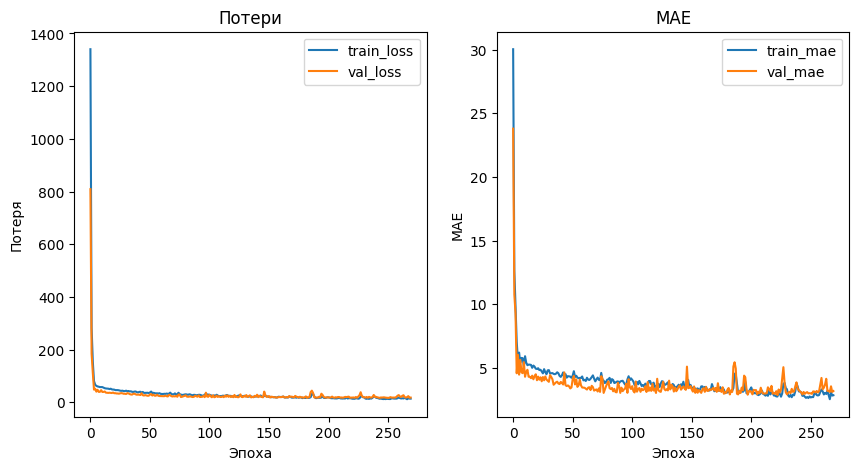

In [114]:
plt.figure(figsize=(10, 5))

# График потерь на обучающем наборе
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Потери')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

# График MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.title('MAE')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [134]:
model.save('Nick_model.keras')

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [135]:
import gradio as gr

In [136]:
model = load_model('Nick_model.keras')

In [137]:
def predict_price(*inputs):

    features = np.array(inputs)

    features = features.reshape(1, -1)

    features = preprocess_input(features)
    prediction = model.predict(features, verbose=0)
    print("Prediction:", prediction)

    return f"{prediction[0][0]:.2f}"

Created dataset file at: .gradio\flagged\dataset1.csv


## Информация об атрибутах

- **CRIM** – уровень преступности на душу населения по городам  
- **ZN** – доля жилых земель, зонированных под участки площадью более 25,000 кв. футов  
- **INDUS** – доля земель, занятых нежилыми (промышленными) предприятиями по городам  
- **CHAS** – фиктивная переменная, указывающая на близость к реке Чарльз (`1` – если участок граничит с рекой, `0` – в противном случае)  
- **NOX** – концентрация оксидов азота (в частях на 10 миллионов)  
- **RM** – среднее количество комнат на одно жилое помещение  
- **AGE** – доля жилых домов, построенных до 1940 года и занятых владельцами  
- **DIS** – взвешенное расстояние до пяти основных деловых центров Бостона  
- **RAD** – индекс доступности к радиальным автомагистралям  
- **TAX** – ставка налога на недвижимость на полную стоимость за $10,000  
- **PTRATIO** – соотношение числа учащихся к числу учителей по городам  
- **B** – `1000 * (Bk - 0.63)²`, где `Bk` – доля афроамериканского населения по городам  
- **LSTAT** – процент населения с низким социальным статусом  
- **MEDV** – медианная стоимость жилья, занятого владельцами (в тысячах долларов)

---

**Целевая переменная:** `MEDV` – цена, которую необходимо предсказать. Заданное значение в `$1000` соответствует `1`.

Мы будем предсказывать целевую переменную на основе 13 входных признаков.

Некоторые признаки можно игнорировать, если они не способствуют точному прогнозу.

Также возможно создание новых признаков на основе имеющихся данных.

In [151]:
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0, maximum=100, step=0.1, value=10),
        gr.Slider(label="ZN", minimum=0, maximum=100, step=0.1, value=25),
        gr.Slider(label="INDUS", minimum=0, maximum=100, step=0.01, value=10),
        gr.Slider(label="CHAS", minimum=0, maximum=1, step=1, value=1),
        gr.Slider(label="NOX", minimum=0, maximum=100, step=1, value=10),
        gr.Slider(label="RM", minimum=0, maximum=100, step=0.1, value=10),
        gr.Slider(label="AGE", minimum=0, maximum=100, step=0.1, value=15),
        gr.Slider(label="DIS", minimum=0, maximum=100, step=0.1, value=10),
        gr.Slider(label="RAD", minimum=0, maximum=100, step=0.1, value=25),
        gr.Slider(label="TAX", minimum=0, maximum=500, step=0.1, value=70),
        gr.Slider(label="PTRATIO", minimum=0, maximum=100, step=0.1, value=65),
        gr.Slider(label="B", minimum=0, maximum=500, step=0.1, value=350),
        gr.Slider(label="LSTAT", minimum=0, maximum=100, step=0.1, value=20),
    ],
    live=False,  # Отключение автоматического обновления
    outputs=gr.Text(label="Predicted Price ($)"),
    title="Предсказание цены на жилье в Бостоне",
    description="Введите значения для 13 признаков и получите предсказание."
)

In [152]:
interface.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Prediction: [[23.788668]]
Using existing dataset file at: .gradio\flagged\dataset1.csv


#### 2. Проверка обученной модели пользовательскими данными

In [163]:
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
    'TAX', 'PTRATIO', 'B', 'LSTAT'
]

index = range(len(data))

df = pd.DataFrame(data, index=index, columns=columns)
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [164]:
target_df = pd.DataFrame(target, columns=['Target'])
target_df.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [191]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

from imutils import paths
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 2. Загружаем набор данных:

In [193]:
import zipfile

with zipfile.ZipFile('animal-image-dataset-90-different-animals.zip', 'r') as zip_ref:
    zip_ref.extractall('animals_dataset')

### 3. Указываем путь к набору данных:

In [220]:
dataset_path = './animals_dataset/animals/animals'
imagePaths = sorted(list(paths.list_images(dataset_path)))
random.shuffle(imagePaths)

### 4. Загружаем набор данных и формируем общую выборку:

In [221]:
# Ваш код
def load_images(imagePaths, compression_size = 32):
  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [222]:
compression_size = 32

data, labels = load_images(imagePaths, compression_size)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [223]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [224]:
print(len(data))

5400


#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [225]:
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels,
                                                    test_size=0.25,
													random_state=42)

In [226]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [227]:
input_shape = (compression_size * compression_size * 3,)

In [232]:
# Создание модели
model = Sequential()

# Вместо input_shape в первом Dense, используем Input
model.add(Input(shape=input_shape))  # Добавляем слой Input с заданной формой
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [233]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 90)             │         2,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,849,082 (14.68 MB)

 Trainable params: 3,849,082 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

In [234]:
lb.classes_

array(['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison',
       'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee',
       'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog',
       'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant',
       'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla',
       'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus',
       'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish',
       'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard',
       'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi',
       'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot',
       'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine',
       'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper',
       'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid',
       'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle',
       'whale', 'wolf', 'wombat'

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [235]:
INIT_LR = 0.000005
EPOCHS = 200

#### 5.3. Компилируем модель:

In [ ]:
# Ваш код
opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,
										metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [240]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Остановка обучения, если валидационная точность не улучшается в течение 5 эпох
early_stopping = EarlyStopping(patience=5)

# Сохранение модели только при улучшении валидационной точности
checkpoint = ModelCheckpoint(filepath="models/Nick_second_model.keras",  # Путь для сохранения модели
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0)

# Использование этих колбэков в процессе обучения
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32, callbacks=[early_stopping, checkpoint])


In [241]:
Y_train.shape

(4050, 90)

#### 6.2. Запустим процесс обучения модели:

In [242]:
H = model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0192 - loss: 4.4397 - val_accuracy: 0.0156 - val_loss: 4.4810
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0157 - loss: 4.4348 - val_accuracy: 0.0185 - val_loss: 4.4780
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0180 - loss: 4.4319 - val_accuracy: 0.0178 - val_loss: 4.4762
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0139 - loss: 4.4324 - val_accuracy: 0.0170 - val_loss: 4.4770
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0180 - loss: 4.4327 - val_accuracy: 0.0215 - val_loss: 4.4740
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0180 - loss: 4.4300 - val_accuracy: 0.0185 - val_loss: 4.4739
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0140 - loss: 4.4237 - val_accuracy: 0.0207 - val_loss: 4.4733
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0194 - loss: 4.4162 - val_accuracy: 0.

#### 6.3. Загружаем лучшую модель:

In [244]:
model = load_model('models/Nick_second_model.keras')

C:\Users\Nick\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [245]:
predictions = model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00        12
        badger       0.00      0.00      0.00        16
           bat       0.00      0.00      0.00        15
          bear       0.00      0.00      0.00        18
           bee       0.00      0.00      0.00        10
        beetle       0.40      0.12      0.19        16
         bison       0.12      0.12      0.12         8
          boar       0.00      0.00      0.00        17
     butterfly       0.01      0.17      0.02        12
           cat       0.50      0.08      0.14        12
   caterpillar       0.00      0.00      0.00        12
    chimpanzee       0.00      0.00      0.00        11
     cockroach       0.00      0.00      0.00        19
           cow       0.00      0.00      0.00        12
        coyote       0.00      0.00      0.00        16
          crab       0.00      0.00      0.00        12
        

C:\Users\Nick\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nick\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nick\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

#### 7.2. Выведем матрицу ошибок

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


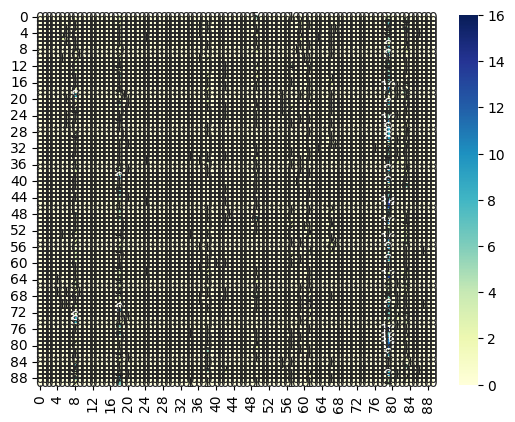

In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Получим прогнозы по валидационным данным
Y_pred = model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)

# Убедимся, что Y_val — это метки классов (если это не так, применим argmax)
if Y_val.ndim > 1:
    Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

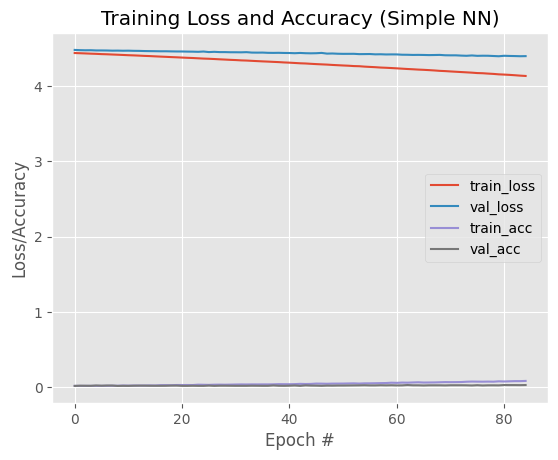

In [252]:
# Получаем количество эпох, которое использовалось в процессе обучения
epochs = len(H.history["loss"])

# Строим графики потерь и точности
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')


### 8. Сохранение модели и меток классов:

In [253]:
# Ваш код
def save_model_and_labels(model, lb, model_path = "model.keras", labels_path = "label_bin"):
    # Сохранение модели
    model.save(model_path, save_format="keras")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [254]:
model_path = "model.keras"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [255]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [256]:
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [259]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.keras", label_path = "label_bin"):
    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    )

# Запускаем интерфейс
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7866
* Running on public URL: https://60e65785ee8f2c6a05.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
